#Importing the Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "colab"

In [97]:
data = pd.read_csv("https://raw.githubusercontent.com/Halaarav/DATA-SCIENCE-PROJECTS/main/churn.csv") #Reading the data

In [98]:
data #Seeing that the data is imported correctly

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [99]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [100]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [101]:
data.shape #This dataset contains 10000 observations and 14 features

(10000, 14)

In [102]:
data.columns #Features of the dataset

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [104]:
data.describe() #Various sample statistics of the numerical features

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


> **Feature Engineering:**

Changing the names of some features to make them more interpretable.\
Changing the 0's and 1's to interpretable labels for a couple of features.



In [105]:
data.rename(columns={'HasCrCard': 'Credit Card Status', 'IsActiveMember': 'Activity', 'Exited': 'Status'}, inplace=True) #Changing feature names for HasCrCard, IsActiveMember,Exited
data.Status = data.Status.map({0: 'Retained', 1: 'Exited'}) #Mapping 0's to Retained and 1's to Exited
data['Credit Card Status'] = data['Credit Card Status'].map({0: 'No Credit Card', 1: 'Has Credit Card'}) #Mapping 0's to No Credit Card and 1's to Has Credit Card
data.Activity = data.Activity.map({0: 'Inactive', 1: 'Active'}) #Mapping 0's to Inactive and 1's to Activr

Checking for the null or missing values in the dataset

In [106]:
data.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
Credit Card Status    0
Activity              0
EstimatedSalary       0
Status                0
dtype: int64

    There were no missing values in the dataset

In [107]:
data.nunique() #Displays the number of unique values for each feature

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
Credit Card Status        2
Activity                  2
EstimatedSalary        9999
Status                    2
dtype: int64

Dropping the redundant columns/features from the dataset

In [108]:
data_new = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

# Exploratory Data Analysis

> Knowing the Numerical and Categorical features

In [109]:
Numerical = [] #Declaring lists
Categorical = []
for columns in data_new:
    if (data_new.dtypes[columns] == 'int64') or (data_new.dtypes[columns] == 'float64'): #Checking the datatype of the features of the dataset 
        Numerical.append(columns) 
    else:
        Categorical.append(columns) #Adding all the 'obj64' features as Categorical variables
        
Numerical, Categorical

(['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'EstimatedSalary'],
 ['Geography', 'Gender', 'Credit Card Status', 'Activity', 'Status'])

 >Plotting the Barplots for the Numerical Variables

Numerical Variables


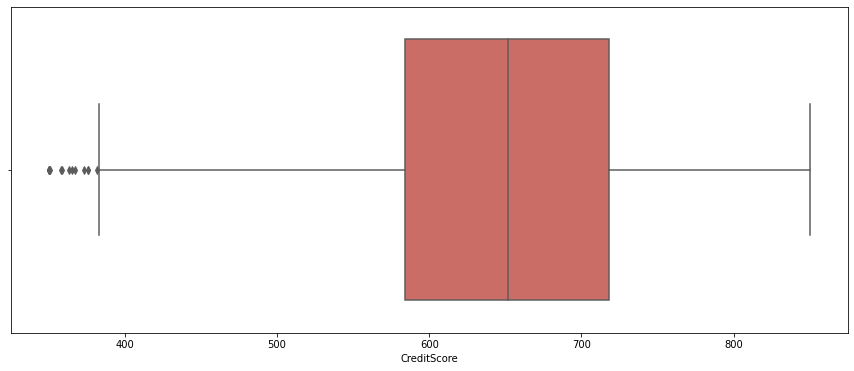

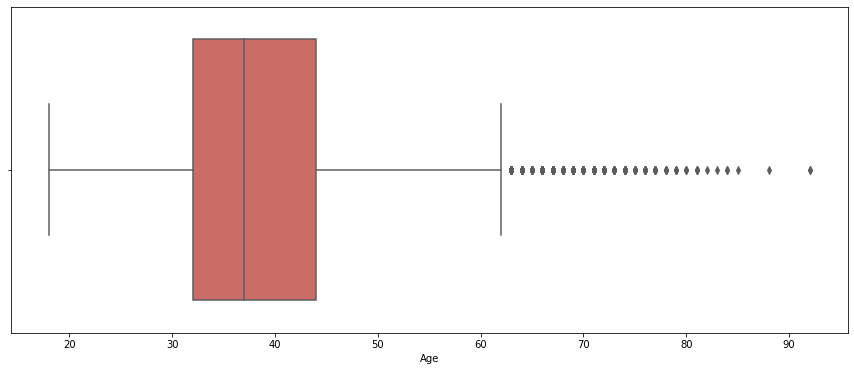

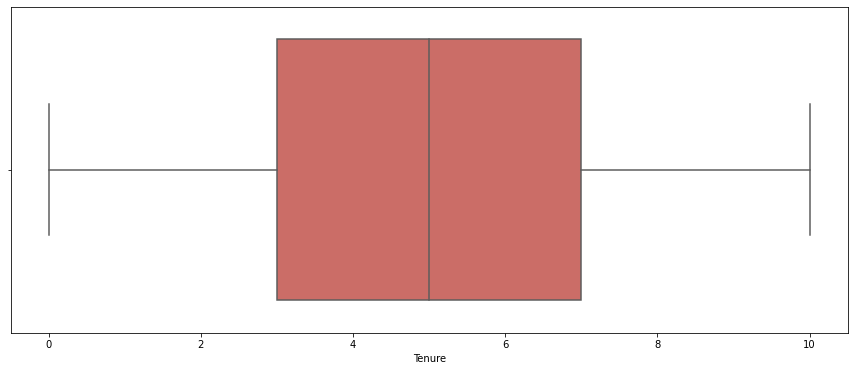

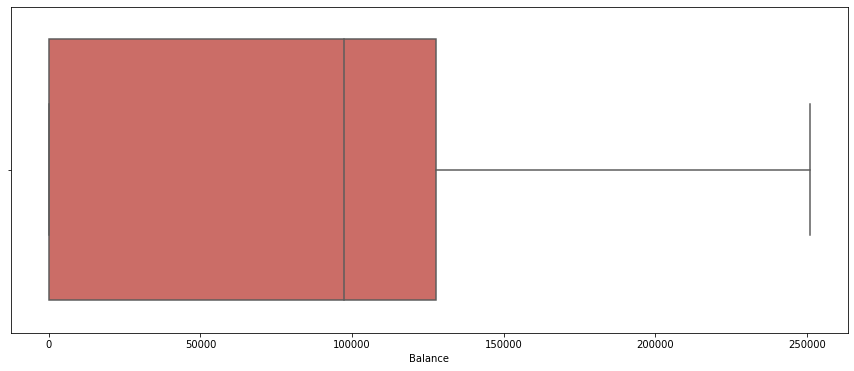

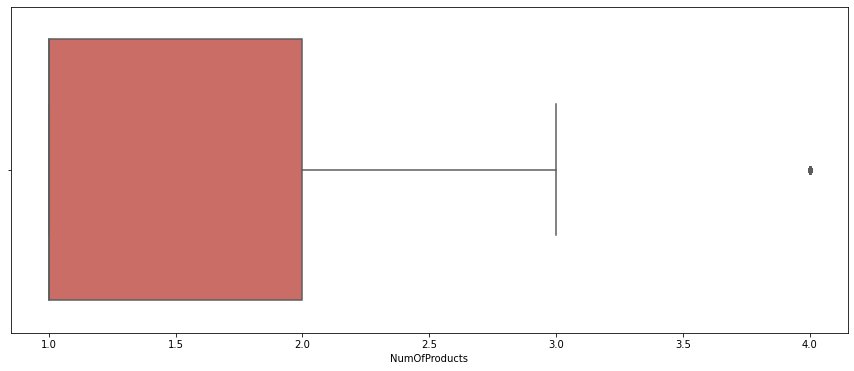

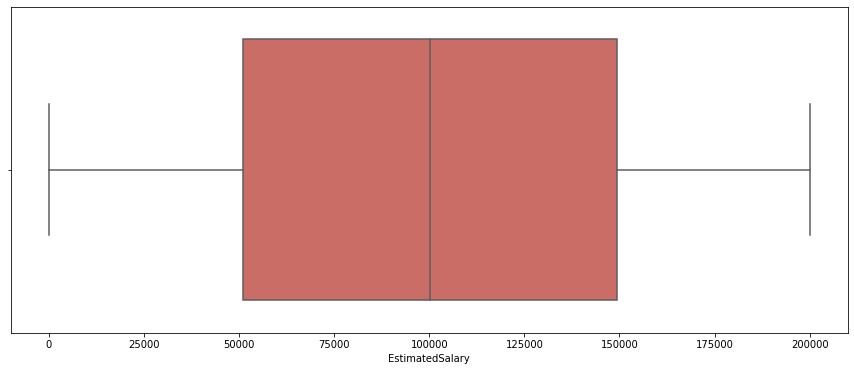

Categorical Variables


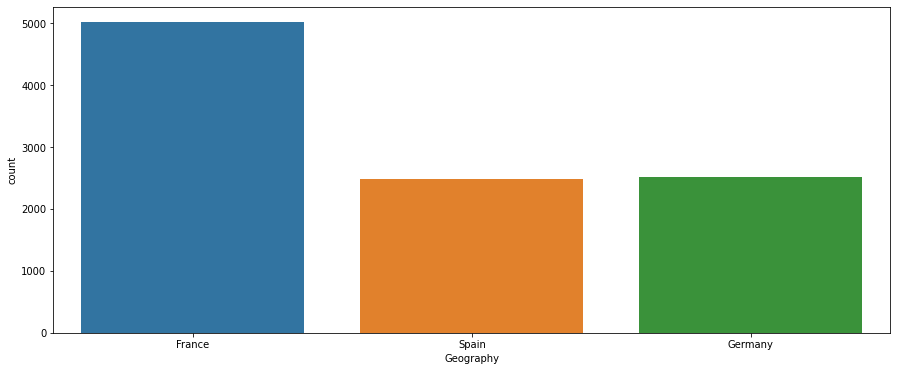

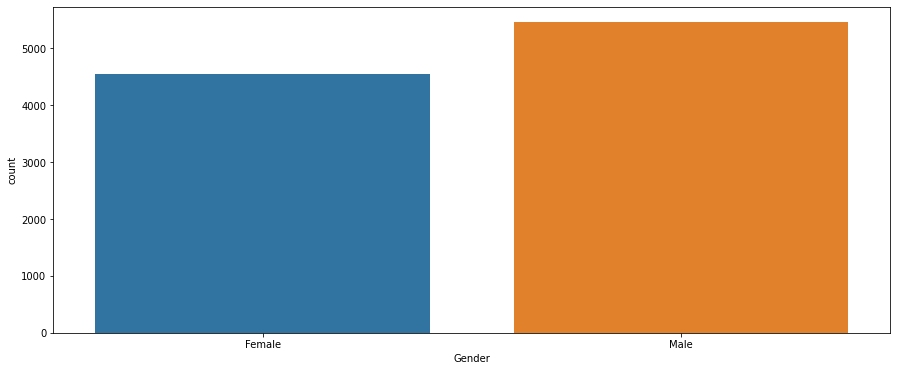

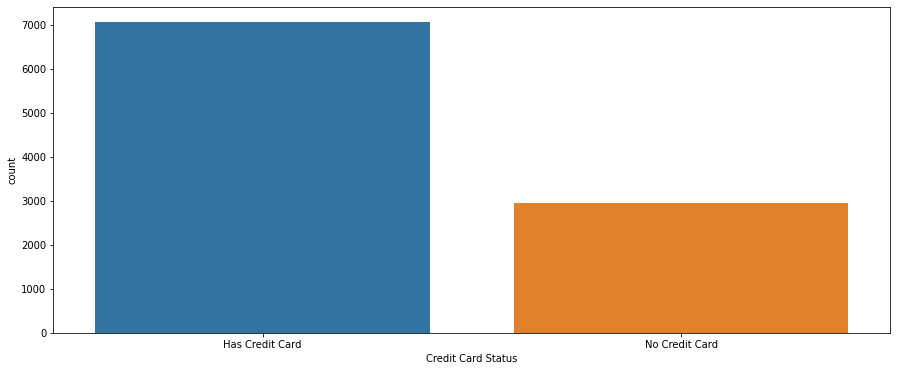

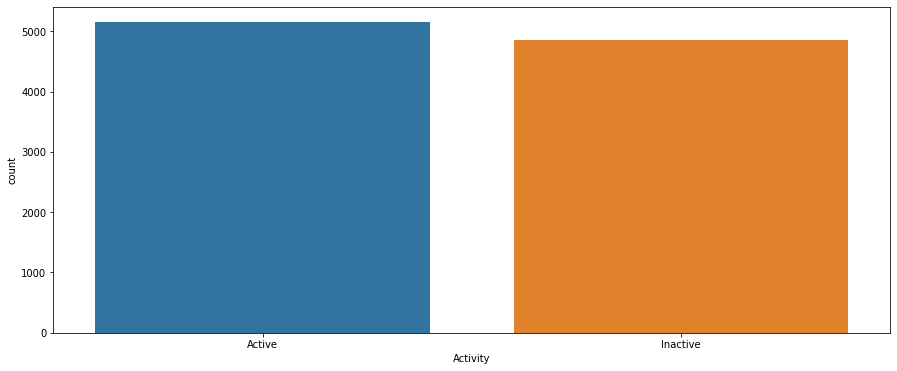

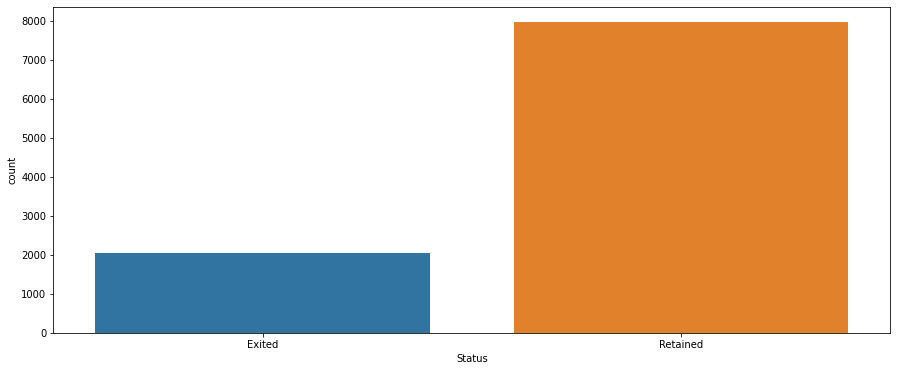

In [110]:
print("Numerical Variables")
for i in Numerical:
  plt.figure(figsize=(15,6))
  sns.boxplot(x = i, data = data_new, palette = 'hls')
  plt.show()
print("Categorical Variables")
for i in Categorical:
  plt.figure(figsize=(15,6))
  sns.countplot( x = i,data = data_new)
  plt.show()
 

### UNIVARIATE ANALYSIS

GEOGRAPHY

In [111]:
data_new["Geography"].unique() #Unique values in Geography 

array(['France', 'Spain', 'Germany'], dtype=object)

In [112]:
data_new["Geography"].value_counts() #Count of each unique value

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

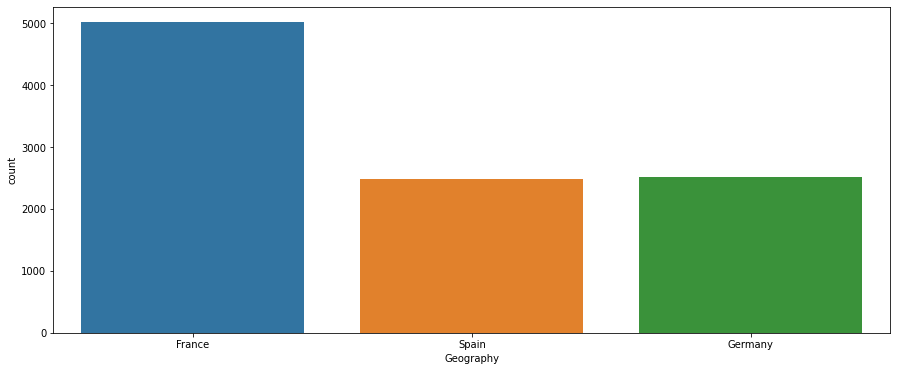

In [113]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Geography', data = data_new)


In [114]:
px.pie(data_new, names = 'Geography', hole=0.3)

    The bank has a majority of French customers i.e.50% approximately.
    On the other hand, there is an equal distribution of customers across Germany and Spain. 

GENDER

In [115]:
data_new["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

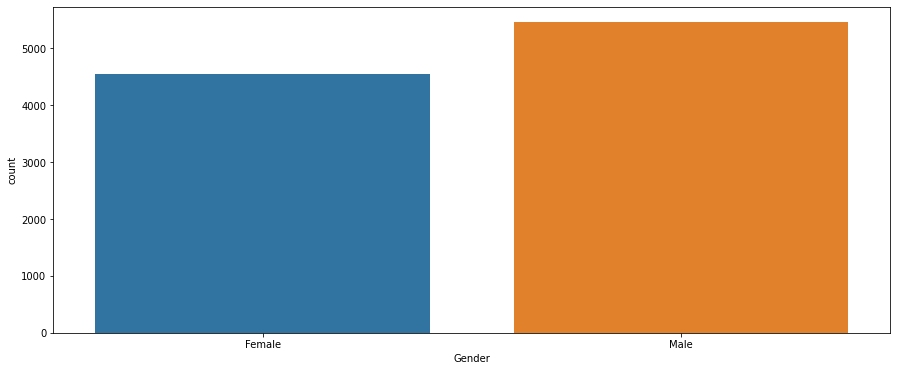

In [116]:
plt.figure(figsize=(15,6))
sns.countplot(x="Gender", data = data_new)
plt.xticks(rotation = 0)
plt.show()

In [117]:
fig_gender = px.pie(data_new, names = 'Gender', hole=0.3)
fig_gender.show()

    The male proportion is 54.6%, there were no more gainful insights.

In [118]:
data_new ["NumOfProducts"].unique()

array([1, 3, 2, 4])

In [119]:
data_new["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

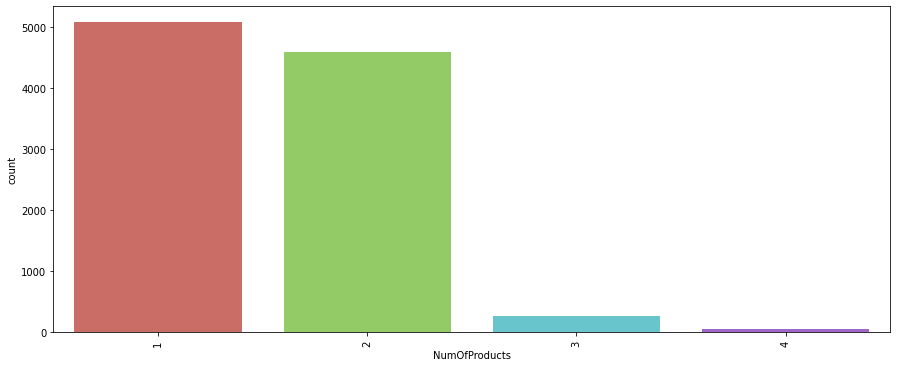

In [120]:
plt.figure(figsize=(15,6))
sns.countplot(x="NumOfProducts", data = data_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [121]:
fig_prod = px.histogram(data_new, x = 'NumOfProducts',color = 'NumOfProducts') 
fig_prod.show()

    Most of the customers had subscribed to either 1 product or 2 products significantly.

CREDIT CARD STATUS

In [122]:
data_new['Credit Card Status'].unique()

array(['Has Credit Card', 'No Credit Card'], dtype=object)

In [123]:
data_new['Credit Card Status'].value_counts()

Has Credit Card    7055
No Credit Card     2945
Name: Credit Card Status, dtype: int64

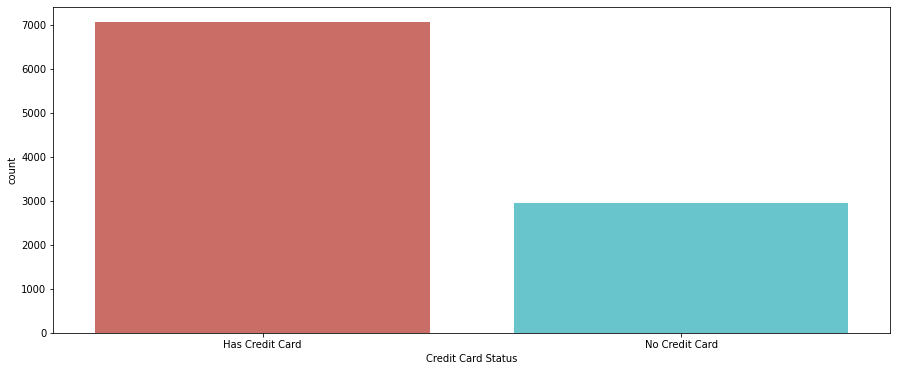

In [124]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Credit Card Status', data = data_new,palette = 'hls')
plt.show()

In [125]:
fig_credit = px.pie(data_new, names = 'Credit Card Status')
fig_credit

    70.5% of the bank's customers have subscribed to credit card, hence, it explains there being a
    majority of customers have subscribed to only 1  product of the bank, the product being a 'Credit Card'.

ACTIVITY

In [126]:
data_new['Activity'].unique()

array(['Active', 'Inactive'], dtype=object)

In [127]:
data_new['Activity'].value_counts()

Active      5151
Inactive    4849
Name: Activity, dtype: int64

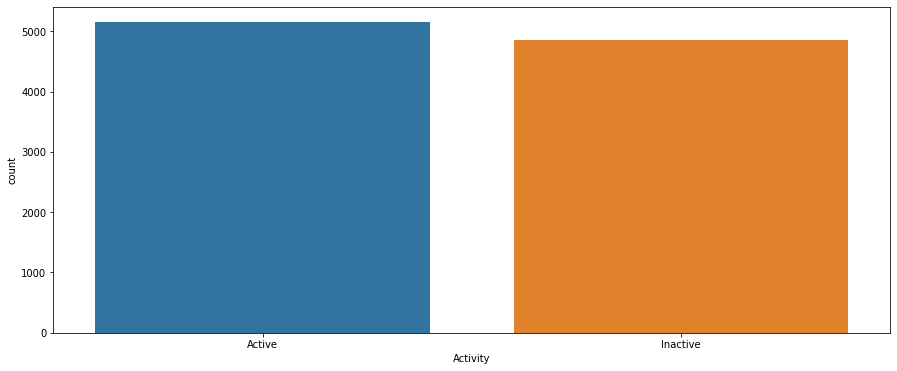

In [128]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Activity', data = data_new)
plt.show()

In [129]:
fig_activity = px.histogram(data_new, x = 'Activity', color = 'Activity')
fig_activity

    There is an equal proportion of active and inactive customers of the bank.

STATUS

In [130]:
data_new['Status'].unique()

array(['Exited', 'Retained'], dtype=object)

In [131]:
data_new['Status'].value_counts()

Retained    7963
Exited      2037
Name: Status, dtype: int64

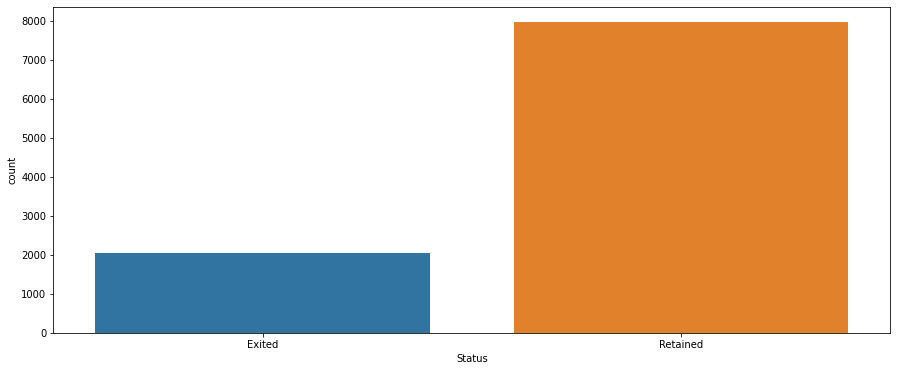

In [132]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'Status', data = data_new)

In [133]:
pie_status = px.pie(data_new , names = 'Status', hole = 0.5)
pie_status.show()

    Approximately 80% of the customers tend to stay.

### BI-VARIATE ANALYSIS

Comparing the age groups that tend to stay and with those who tend to exit

In [134]:
px.histogram(data_new, x='Age', color='Status')

    Both the distributions can be approximated to a normal distribution,
    The mean age for those who tend to stay comes out to be approximately 35 whereas the mean age for those 
    who exit comes out to be 45.

In [135]:
px.histogram(data_new, x='CreditScore', color='Status')

    The distributions can be approximated to a normal distribution with a mean credit score of around 650
    with a lot of outliers with a high credit score.

In [136]:
px.box(data_new, x='Tenure', color='Status')

    The median of the Tenure is same for both the sets 
    of customers, one who were retained and the others 
    who exited. This indicates that tenure might not be a differentiating factor in our churn analysis.

In [137]:
px.histogram(data_new, x='Balance', color='Status')

    The mean of both the distribution seems around 
    125k which again suggests that the 'Balance' might 
    not be a fruitful indicator for our target variable.

In [138]:
px.histogram(data_new, x='EstimatedSalary', color='Status')

    The 'EstimatedSalary' seems to follow a uniform distribution with a mean of around 100k for both the distributions.
    This also suggests that we must look for a variable which behaves differently for our target classes.


In [139]:
fig = px.sunburst(data_new, path=['Credit Card Status', 'Status'])
fig.update_traces(textinfo='label + percent parent')

    There is a high proportion of credit card holders in the bank and although 
    the proportion of non-credit card customers is less they tend to exit more. 
    So this might be an important feature for our model.

In [140]:

fig = px.sunburst(data_new, path=['Activity', 'Status'])
fig.update_traces(textinfo='label + percent parent')

    Clearly, from the above visual we can see that though the proportion of the active customers is similar to the inactive customers,
    there is a high proportion of customers who exited given their account was inactive.

In [141]:
fig = px.sunburst(data_new, path=['NumOfProducts', 'Status'])
fig.update_traces(textinfo='label + percent parent')

    There is a vast majority of customers who have subscribed to one or two of the bank's products.
    But there is a huge number of customers who had subscribed to a single product and have exited the bank 
    as compared to the number of customers who had subscribed to two products and have had still exited.
    (This proportion of people reflect the loyal customers of the bank)

# MODEL FITTING

One-Hot Encoding(Feature Enginnering) before Model Fitting:

In [142]:
X = data_new.drop("Status",axis=1)    #The set of predictors
X = pd.get_dummies(X)                 #Creating dummies for the required features
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Credit Card Status_Has Credit Card,Credit Card Status_No Credit Card,Activity_Active,Activity_Inactive
0,619,42,2,0.00,1,101348.88,1,0,0,1,0,1,0,1,0
1,608,41,1,83807.86,1,112542.58,0,0,1,1,0,0,1,1,0
2,502,42,8,159660.80,3,113931.57,1,0,0,1,0,1,0,0,1
3,699,39,1,0.00,2,93826.63,1,0,0,1,0,0,1,0,1
4,850,43,2,125510.82,1,79084.10,0,0,1,1,0,1,0,1,0


In [143]:
y = data_new.Status     #The target variable

> Importing some more Libraries

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

> Train-Validation-Test Split using sklearn.model_selection

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=20)

> Parameter Tuning using Train-Valid Split

In [146]:
depth = np.arange(1,15)
auroc=[]                    #Using area under the curve as our evaluation metric for this classification model
for k in depth:
  dt_classifier = DecisionTreeClassifier(max_depth=k,min_samples_leaf=5)
  dt_classifier.fit(X_train,y_train)    #Fitting the model 
  y_predicted_prob = dt_classifier.predict_proba(X_val)
  auroc.append(roc_auc_score(y_val, y_predicted_prob[:,1]))

Calculating the score on our training data

In [147]:
dt_classifier.score(X_train,y_train)

0.9155

    The training score is high which means there is a chance of over-fitting, hence, we need to tune the parameters to reduce 
    variance using cross validation.

In [148]:
auroc #The area under the curve for all the possible values of max_depth

[0.7024572649572649,
 0.7441026855089355,
 0.8001013743201244,
 0.8101416812354312,
 0.8330958321192695,
 0.8242695889180263,
 0.8131631823038072,
 0.7936463493104118,
 0.7869227127039626,
 0.7898903396950272,
 0.7828988502816627,
 0.7712673611111112,
 0.7629267433954934,
 0.7604417067307692]

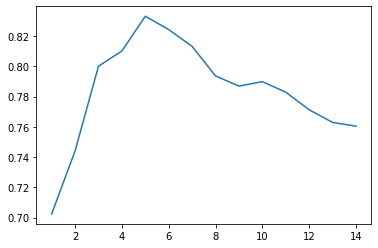

In [149]:
plt.plot(depth,np.array(auroc)) #Plotting the auroc scores for each max_depth value

Selecting the best depth as 5 or 6

In [150]:
dt_final = DecisionTreeClassifier(max_depth=5,min_samples_leaf=5) #Training the model with the best max_depth
dt_final.fit(X_train,y_train) #Fitting the model again on the training datas

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

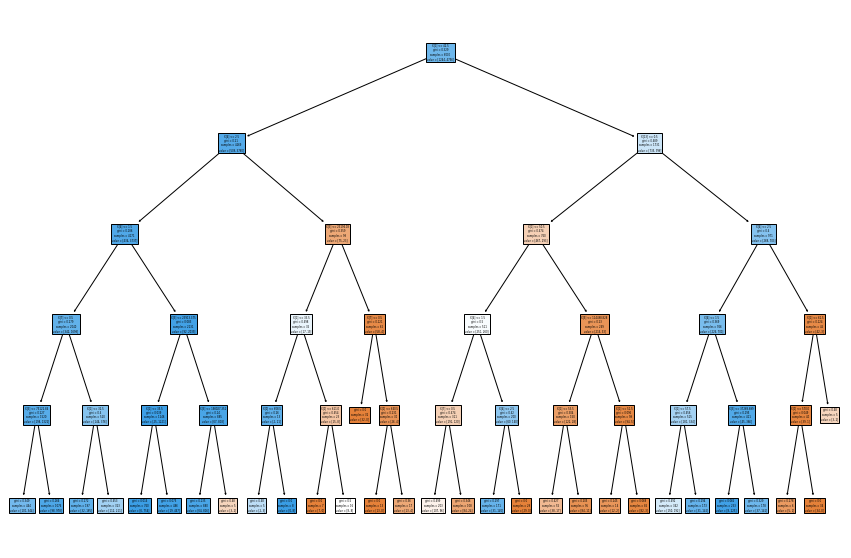

In [151]:
plt.figure(figsize=(15, 10))      #Displaying the tree with max_depth=5
tree.plot_tree(dt_final, filled=True)
plt.show()

In [152]:
y_pred_final = dt_final.predict(X_test) #Making predictions on the test data

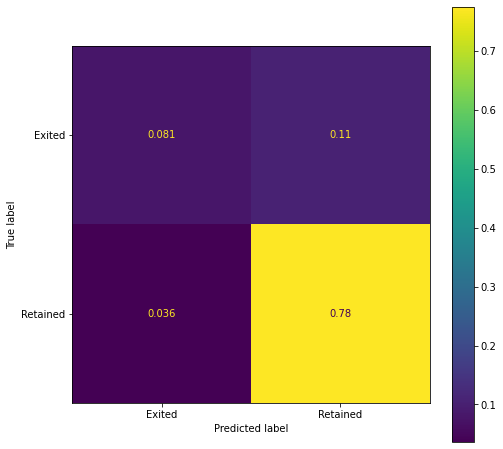

In [153]:
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final, normalize='all', ax=ax) #The confusion matrix for 
plt.show()

In [154]:
y_pred_prob = dt_final.predict_proba(X_test)    #Making probability based predictions on the test data-There will always be a tradeoff between the senstivity and specificity. 
roc_auc_score(y_test, y_pred_prob[:, 1])        # Calculate area under roc curve when max_depth = 5

0.8237610542091388

Plotting the AU-ROC 

Text(0.5, 0.98, 'ROC Curve for DT Model')

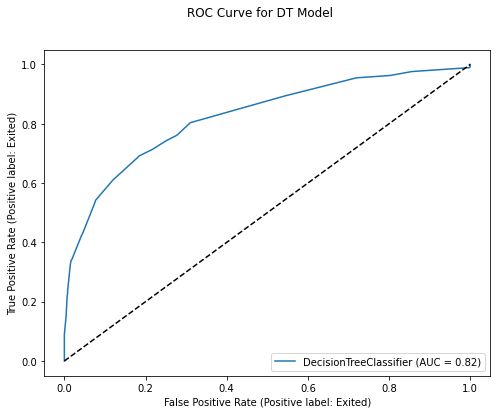

In [155]:
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(dt_final, X_test, y_test, pos_label='Exited', ax=ax)
ax.plot([0, 1], [0, 1], 'k--' )
fig.suptitle('ROC Curve for DT Model')

Plotting the importance of each feature as considered by our decision tree

In [156]:
px.bar(x=dt_final.feature_names_in_, y=dt_final.feature_importances_)

Hyperparameter tuning using Cross-Validation

In [157]:
from sklearn.model_selection import GridSearchCV #Performing k-fold cross validation

In [158]:
grid = GridSearchCV(cv = 10, estimator = DecisionTreeClassifier(), n_jobs=-1,       #Permorming 10-fold cross validation
                    param_grid = {'criterion':['gini','entropy'],                   #Setting the parameters
                                  'max_depth': range(1,10),
                                  'min_samples_leaf' : range(1,5),
                                  'min_samples_split': range(1,10)},
                    verbose = 1)

In [159]:
grid.fit(X_train,y_train) #Fitting the grid search on our training data

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [160]:
grid.best_params_ #Getting the best optimised parameters for our tree

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [161]:
dt_classifier_optimised = DecisionTreeClassifier(max_depth = 6, min_samples_leaf=4, min_samples_split=7)    #Training the model with our optimised and tuned parameters
dt_classifier_optimised.fit(X_train,y_train) #Fitting the model
y_pred_optimised = dt_classifier_optimised.predict(X_test) #Predicting on the test data

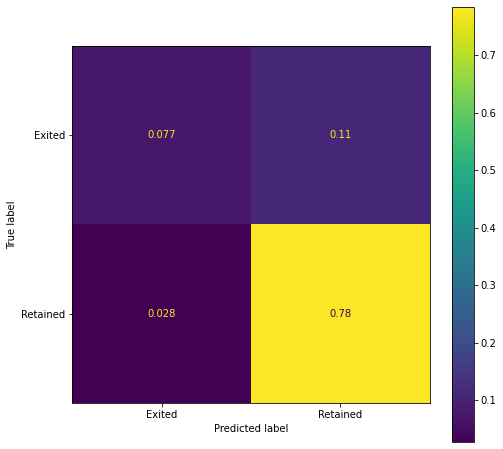

In [162]:
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_optimised, normalize='all', ax=ax)   #The confusion matrix
plt.show()

In [163]:
y_pred_prob = dt_classifier_optimised.predict_proba(X_test)  #Calculating the auroc score
roc_auc_score(y_test, y_pred_prob[:, 1])

0.8386318357954538

Clearly performing hyper-parameter tuning using cross-validation has increased the performance on the test data. It seems to be the perfect bias-variance tradeoff.

In [164]:
dt_classifier_optimised.score(X_train,y_train)

0.8675

In [165]:
dt_classifier_optimised.score(X_test,y_test)

0.861

### Implementing a Logistic Regression Model for this classification problem

In [166]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [168]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [169]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [170]:
model.classes_

array(['Exited', 'Retained'], dtype=object)

In [171]:
y_train.head()

4153      Exited
6858    Retained
6879    Retained
4902    Retained
1042      Exited
Name: Status, dtype: object

In [173]:
model.predict_proba(X_test)

array([[0.1194953 , 0.8805047 ],
       [0.10854118, 0.89145882],
       [0.1491077 , 0.8508923 ],
       ...,
       [0.19963631, 0.80036369],
       [0.24640118, 0.75359882],
       [0.11267514, 0.88732486]])

In [176]:
y_pred_logit=model.predict(X_test)

In [175]:
model.score(X_test, y_test)

0.8045

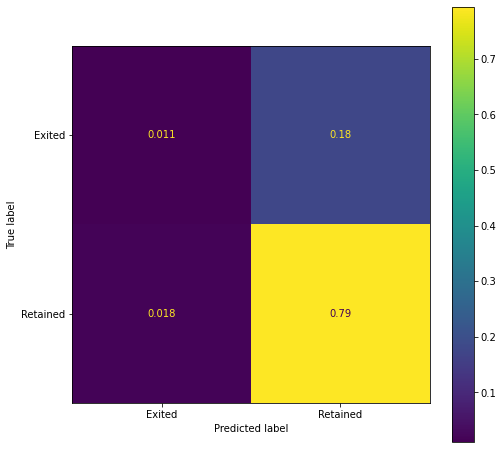

In [177]:
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logit, normalize='all', ax=ax)   #The confusion matrix
plt.show()

Using a logistic regression model for classification, we get an accuracy of 80.45



---

